In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from scipy.stats import zscore
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data_train_input = pd.read_csv('train.csv')
data_test_input = pd.read_csv('test.csv')

In [3]:
data_train_input.sample(n=5,replace=True, random_state=0, axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C


前処理について記述せよ  
以下の観点をすべて含めて記述しましょう。  
前処理とは何か  
なぜ前処理を行う必要があるのか  
前処理は具体的に何を行うか(3つ以上記述せよ)  
前述した具体的な前処理について、その前処理を行うと何を得ることができるか(記述したそれぞれの前処理例について記述せよ)  
【回答】  
未加工のデータは、多くの場合、ノイズが多く、信頼性が低く、値が欠落している可能性もあります。  
そのため学習前に前処理をする必要がある。  
１．欠損値の処理  
　　欠損値を平均値等で補完することにより説明変数として利用できる。  
２．文字列の処理（数値に変換）  
　　文字列を数値に置き換えることにより説明変数として利用できるようにする。  
３．外れ値の処理  
　　外れ値を削除することにより予測精度を向上させることが可能。  


前処理について記述せよ  
前処理について記述せよの調査により、データを確認する際にどのような点を見るとよいか、3つ以上記述せよ。  
【回答】  
１．欠損値があるかどうか  
２．文字列が含まれているかどうか  
３．平均値と最大値/最小値を確認して、平均値よりはるかに大きい最大値/最小値が含まれていないか確認（グラフ化して見る）  
　　

In [4]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train_input)
data_test = transform_features(data_test_input)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


In [5]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


前処理の内容について記述せよ  
以下の観点をすべて含めて記述しましょう。  
simplify_ages  
simplify_cabins  
simplify_fares  
format_name  
drop_features  
encode_features  
以上のメソッドがそれぞれ何を行っているか記述せよ  
それぞれなぜそのようなことを行っているか記述せよ(それによって得られるメリットまで考察すること)  
【回答】   
simplify_ages:  
年齢の範囲により８つのグループに分ける。年齢が不明の場合はunknowとする。    
年齢そのものを使うよりグループにした方が解析をしやすい。  
simplify_cabins:  
NaNをNで穴埋め、NaN以外を頭文字のみにする。  
欠損値が多いため使えそうにないためが単純な文字に置き換えて後で使えるかどうか判断する。  
simplify_fares：  
料金の範囲により５つのグループに分ける。料金が不明の場合unknowとする。
料金そのものを使うよりグループにした方が解析をしやすい。  
format_name：  
新しい列を２つ追加し、それぞれ苗字と敬称を抜き出して追加。  
家族関係、年齢の解析に使用するため。  
drop_features：  
指定した列の削除。
関連があまりなさそうなので削除した。  
encode_features：  
カテゴリカルデータを、数値に変換。  
数値データに変換することにより解析できるようにする。  

モデル選択について記述せよ  
今回使用するモデルは決定していますが、モデル選択をする際の演習を行いましょう。  
今回は、生存予測（分類）を行いますが、この分類について使用できそうな手法を4つ以上しらべて記述せよ。  
その手法の概要をそれぞれ記述せよ  
その手法の長所/短所をそれぞれ3つずつ、記述したすべての手法において記述せよ  
【回答】  

【ランダムフォレスト】  
決定木による複数の弱学習器を統合させて汎化能力を向上させる、アンサンブル学習アルゴリズム。  
「長所」  
・特徴量のスケーリングが必要ない。  
・ノイズに強い。  
・データ量が多くても高速。  
・どの特徴量が重要かを知ることができる。  
「短所」  
・説明変数が多くなる。  
・過学習になる。  
・データと変数が少なすぎると、うまく学習できない。  
  
【k近傍法】  
学習データをベクトル空間上にプロットしておき、未知のデータが得られたら、そこから距離が近い順に任意のK個を取得し、  
多数決でデータが属するクラスを推定する。  
「長所」  
・データ全体ではなく、一部のデータだけを使うので、YとXの関係を数式で表す事ができなくても、確からしい推測ができる。  
・局所的な推測に、有利。  
・データ全体を使わないので、 外れ値の影響を受けにくい。  
「短所」  
・kの選び方で、結果が変わるので、結果の妥当性の評価が難しい。  
・Xの広い領域では、Yに大きな幅があるけれども、狭い領域では幅が小さい時に威力を発揮しやすい方法。  
　狭い領域でも幅が大きい時は、推測値の妥当性がなくなる。  
・分類のたびに訓練事例全体を走査するため，分類に必要な計算量は大きい。  

【サポートベクターマシーン】  
広く利用されている強力な学習アルゴリズムの一つ。パーセプトロンの拡張とみなすことができる。  
SVMでの最適化の目的はマージンを最大化すること。  
「長所」  
・データの特徴の次元が大きくなっても識別精度が良い。  
・最適化すべきパラメータが少ない。  
・パラメータの算出が容易。  
「短所」   
・学習が非常に非効率なことです。  
・学習データが増えると計算が膨大になる。  
・基本的には２クラスの分類にしか使えない。  
  
【勾配ブースティング】  
逐次的に弱学習器を構築していく手法。逐次的というのは，弱学習器を1つずつ順番に構築していくという意味。  
新しい弱学習器を構築する際に，それまでに構築されたすべての弱学習器の結果を利用する。  
「長所」  
・教師あり学習の中で最も強力。  
・モデルの占めるメモリが小さく、予測も早い。  
・浅い決定木のような、簡単なモデル（弱学習機）で構成。  
「短所」  
・計算を並列化できない。  
・パラメータチューニングに細心の注意が必要。  
・訓練にかかる時間が長い。  

モデル選択の基準  
下記の参考資料を元に、どのような視点からモデルを選択すれば良いか、最低でも3つ以上の視点を記述すること  
(他の参考資料でも構わない、その場合参考資料を明記すること)  
【回答】   
1.精度  
　正確な回答を得ることが常に必要であるとは限らない。  
　より大まかな方法を使用することで、処理時間を大幅に削減できる。  
2.トレーニング時間  
　トレーニング時間は精度と密接に関係しいる。  
　時間が限られている場合、アルゴリズムの選択を左右することがある。  
3.パラメーターの数  
　パラメーター数の多いアルゴリズムは、適切な組み合わせを見つけるのに多くの試行錯誤が必要。  

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

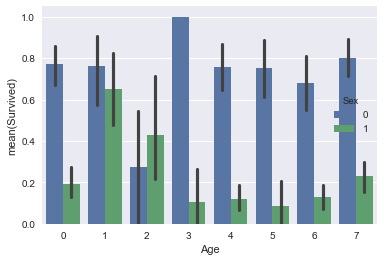

In [7]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=data_train);

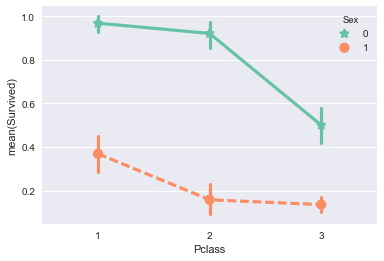

In [8]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train, 
              palette="Set2",
              markers=["*", "o"], linestyles=["-", "--"]);

データ可視化の結果について考察せよ  
以下の観点をすべて含めて記述しましょう。  
上記の２つの可視化から分かったことについて考察せよ。  
上記の考察結果から、モデル選択を考える場合、どのようなことが考えられるか  
【回答】  
・Teenager以上では男性より女性の方が亡くなっている。  
・Childでは男性の方が多く亡くなっている。  
・Babyでは男性も女性も同じくらい亡くなっている。  
・女性の場合、乗客の階級が3の人より亡くなっている。  
・男性の場合、乗客の階級が２、３の人より亡くなっている。

精度を高く、因果関係（中身のわかりやすさ）がわかるように予測したい。

In [9]:
from sklearn.model_selection import train_test_split

X = data_train.drop(['Survived', 'PassengerId'], axis=1)
y = data_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 9)
(179, 9)
(712,)
(179,)


ランダムフォレストについて記述せよ  
今回は、ランダムフォレストという手法を使用します。  
以下の観点をすべて含めて記述しましょう。  
決定木とはどのような手法か  
ランダムフォレストとはどのような手法か  
ランダムフォレストの長所と短所をそれぞれ3つ以上挙げてください。  
今回の目的からランダムフォレストの手法が適する理由を考察し、記述せよ  
※決定木とランダムフォレストについては、前述のモデル選択について記述せよにおいて記述していた場合、同じものを記述しても構いません。  
【回答】  
  
【決定木】    
「長所」  
・可読性が高い。  
・データ分布の型を問わない。  
・外れ値に対して頑健。  
「短所」  
・分類性能が高い手法ではない。  
・木が過度に分岐することが多い。  
・データが少し変わるだけで全く違う木が生成されることがある。  
・線形性のあるデータには適していない。  
・XORの分類はできない。  
  
【ランダムフォレスト】  
決定木による複数の弱学習器を統合させて汎化能力を向上させる、アンサンブル学習アルゴリズム。  
「長所」  
・特徴量のスケーリングが必要ない。  
・ノイズに強い。  
・データ量が多くても高速。  
・どの特徴量が重要かを知ることができる。  
「短所」  
・説明変数が多くなる。  
・過学習になる。  
・データと変数が少なすぎると、うまく学習できない。  


In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
from sklearn.metrics import accuracy_score
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.77094972067


ハイパーパラメータについて  
ハイパーパラメーターとは何か  
ランダムフォレストにおいてどのようなハイパーパラメーターがあるか4つ以上記述せよ  
記述したハイパーパラメーターにおいて、それぞれどのような値が存在するか記述せよ  
（そのハイパーパラメーターを変化させるとどのようなことが起きるかも記述すること）  
【回答】  
n_estimators:整数を指定。バギングに用いる決定木の個数を指定。  
criterion:文字列を指定。"gini"、"entropy" を指定できる。決定木はこの指標を基準にデータを分割する。  
max_features:整数，小数，文字列または None を指定。最適な分割をするために考慮するフィーチャーの数を指定。  
max_depth: 整数または None を指定。決定木の深さの最大値を指定。過学習を避けるためにはこれを調節するのが最も重要。

In [12]:
#'n_estimators': [4, 6, 9],
#'max_features': ['log2', 'sqrt','auto'],
#'criterion': ['entropy', 'gini'],
#'max_depth': [2, 3, 5, 10],
#'min_samples_split': [2, 3, 5],
#'min_samples_leaf': [1,5,8]

検証について記述せよ  
機械学習で思うようなAccuracyを求めることができたら、検証を行いましょう。  
以下の観点をすべて含めて記述しましょう。  
検証は何か  
なぜ検証を行う必要があるのか(Accuracyだけではダメな理由も含めること)  
主な検証方法について2つ以上記述せよ  
【回答】  
汎化能力を確認するためにモデルの学習に使用するデータを学習データ (Train Data)、検証に使用するデータをテストデータ (Test Data)を用いて検証を行う。学習データのみに対する精度だけを見てモデルの評価をしてしまうと学習データを使用した時は精度は良いがたのデータでは精度が悪い
かもしれない。そのためテストデータできちんと汎化能力を確認する必要がある。

1.ホールドアウト法
ある割合で今持っている教師ありデータを、「訓練データ」と「テストデータ」に分割し学習と評価を行う。
2.ブートストラップ法
データ全体NNから重複を許すサンプリングN∗N∗を何度か行い評価する。

KFoldについて記述せよ  
今回はKFold(K-分割交差検証)を使用して、検証を行います。  
以下の観点をすべて含めて記述しましょう。  
K-分割交差検証について説明せよ  
K-分割交差検証はデータセットを何個に分割するか  
データセットを分割する際、その個数はどのように考えると良いか  
K-分割交差検証は何回の検証を行うか  
K-分割交差検証の結果は、最終的にどのように求められるか  
【回答】  
K-分割交差検証では、サンプルをK個に分割する。  
そして、そのうちの1つをテスト用とし、残る K − 1 個を訓練用とする。  
交差検証は、K 個に分割されたサンプルをそれぞれをテストとして k 回検証を行う。  
そうやって得られた k 回の結果を平均して1つの推定を得る。  


In [13]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=False, random_state=0)
scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)
print(np.mean(scores))

0.79013732834


どの特徴量が重要であったかを調査する  
sklearnでランダムフォレストを実装すると用意にどのどの特徴量が重要であったかを判明させることができます。  

feature_importances_メソッドを使用して、判明させましょう。  

In [14]:
clf.feature_importances_

array([ 0.08148013,  0.15173948,  0.08597648,  0.06024637,  0.02462891,
        0.07881216,  0.05477419,  0.30040337,  0.16193891])

Lnameの重要度が一番高く、次いでNamePrefixが高い。   
Parchが一番重要度が低くなっている。   